соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) 

# Первая часть. Исследование

In [2348]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2349]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

data = train.copy()

In [2350]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent' 
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [2351]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [2352]:
data.isna().sum()


ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [2353]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

Заметим, что пустых ячеек нет, но при этом TotalSpent относящийся к num_cols является object, что настараживает. Проверим:

In [2354]:
data.TotalSpent.sort_values(ascending=True)#видим пробелы

4598          
2543          
4551          
1707          
3078          
         ...  
3557    996.85
141     996.95
4317    997.65
3376     998.1
1157     999.9
Name: TotalSpent, Length: 5282, dtype: object

In [2355]:
data.replace(' ', 0, inplace=True)#заменим нулями
data.TotalSpent = data.TotalSpent.astype(float)

## Анализ данных

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

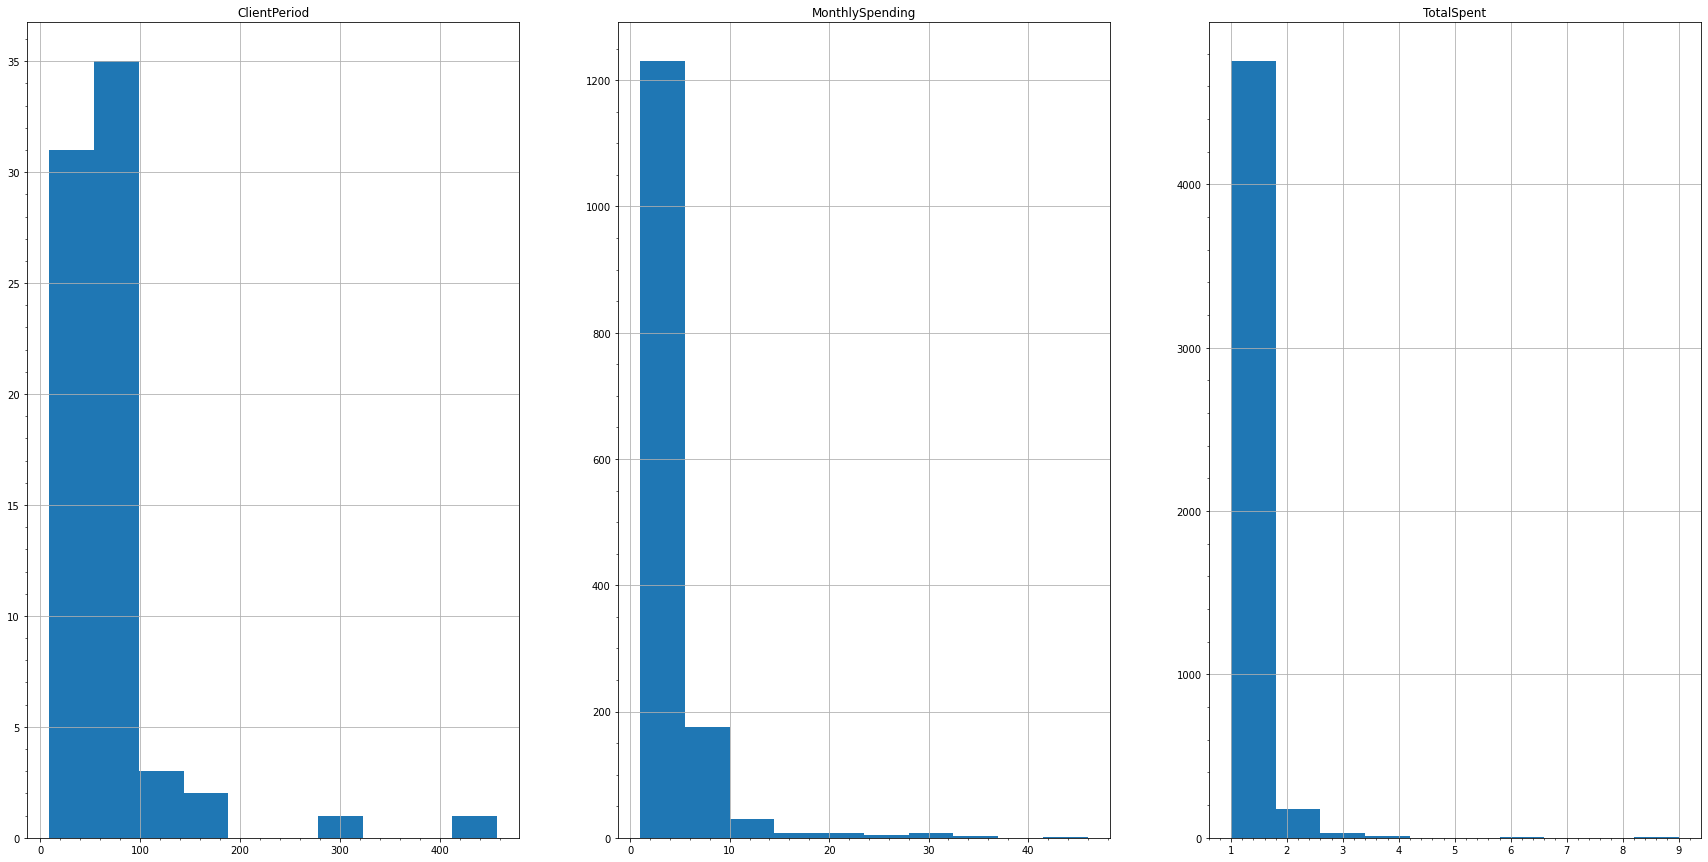

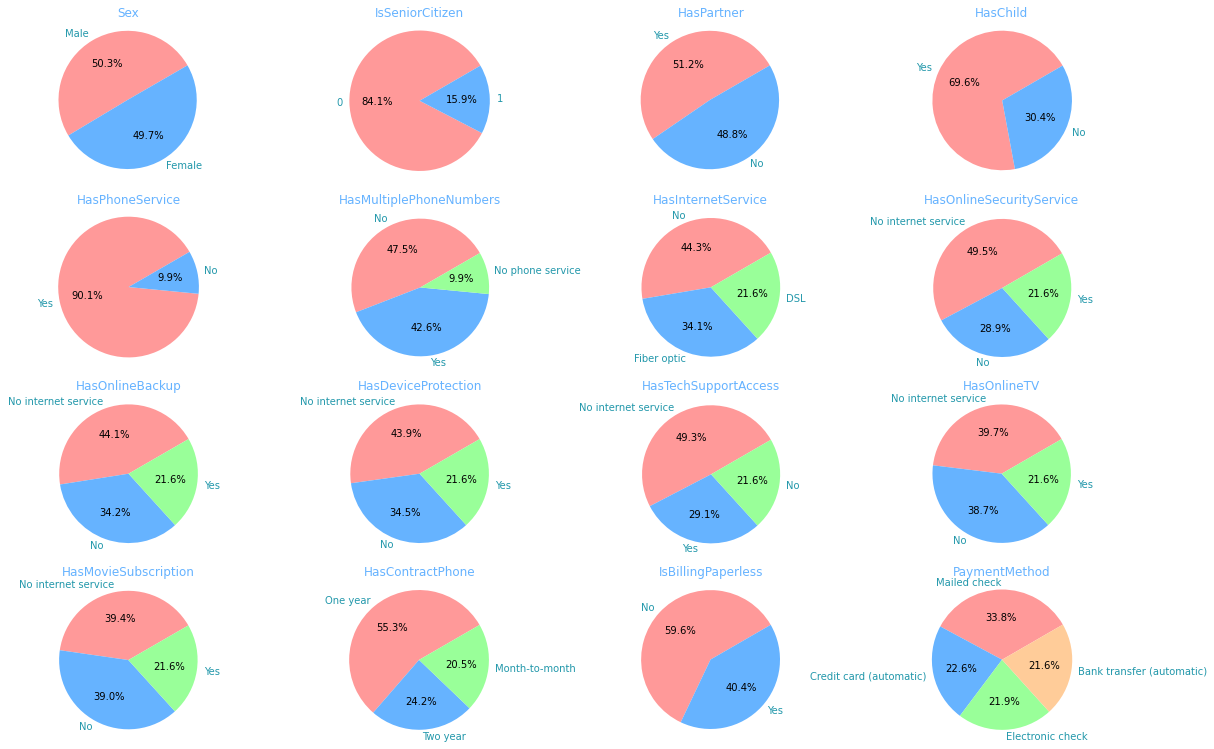

In [2356]:
plt.figure(figsize=(30, 15))

for el, i in zip(num_cols, range(len(num_cols))):
    plt.subplot(1, 3, i + 1)
    plt.hist(data[el].value_counts())
    plt.minorticks_on()
    plt.grid()
    plt.title(el)

plt.figure(figsize=(20, 20))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
for el, i in zip(cat_cols, range(len(cat_cols))):
    plt.subplot(6, 4, i + 1)
    patches, texts, autotexts = plt.pie(data[el].value_counts(), labels=data[el].unique(), autopct='%1.1f%%', colors=colors, startangle=30)
    plt.axis('equal')
    [text.set_color('#2398AB') for text in texts]
    plt.title(el, color='#66b3ff')


(array([3898.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1384.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

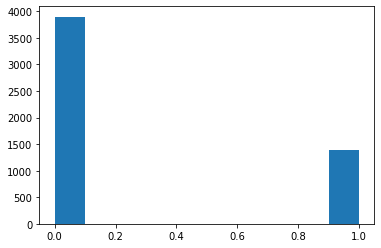

In [2357]:
plt.hist(data[target_col])

Из гистограммы следует, что классы являются не сбалансированными

## Применение линейных моделей


In [2359]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [2360]:
data = pd.get_dummies(data, columns=cat_cols)

pca = StandardScaler()
data[num_cols] = pca.fit_transform(data[num_cols])
y = data[target_col]
data.drop(columns='Churn', inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=777)

Cs = np.logspace(-3, 2, 30)
clf = LogisticRegressionCV(Cs=Cs, random_state=777, scoring='roc_auc')
clf.fit(X_train, y_train)
print(clf.C_[0])

4.175318936560405


In [2361]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8588985833567877

Лучшее качество получилось $score = 0.8588985833567877$, при $C = 4.175318936560405$

## Применение градиентного бустинга


In [2362]:
from catboost import CatBoostClassifier

y = train[target_col]

train.drop(columns='Churn', inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.25)

clf2 = CatBoostClassifier(cat_features=cat_cols, verbose=False)

clf2.fit(X_train, y_train)

roc_auc_score(y_test, clf2.predict_proba(X_test)[:, 1])

0.8363907697790449

Лучшее качество

0.8508283631544069, при cтандартных парметрах

# Предсказания

In [2363]:
best_model = clf2

In [2364]:

X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]

submission['Churn'].to_csv('./my_submission.csv')